### FTIR and satellite measurements in KAO site.

In [16]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from netCDF4 import Dataset
import math

Load FTIR high-resolution data.

In [17]:
# List of required columns:
user_cols = ['year', 'day', 'xn2o(ppb)', 'xch4(ppm)', 'xco2(ppm)']
# Read measured data from Kourovka FTIR station (57.036N; 59.546E):
ftir_high = pd.read_csv('/atm/Kao_carbon/data/ye_2022.vav.ada.aia.oof.csv', delimiter=',', usecols=user_cols)

# Convert day of year to day of month:
date = [ (dt.datetime(int(ftir_high['year'][i]), 1, 1) + dt.timedelta(int(ftir_high['day'][i]) - 1)) for i in range(0, ftir_high.shape[0]) ]

ftir_high.index = pd.to_datetime(date)
ftir_high.drop(columns=['year', 'day'], axis=1, inplace=True)
ftir_high.columns = ['xn2o', 'xch4', 'xco2']

# Averaging:
ftir_high_d_avg = ftir_high.resample("d").mean().dropna()
display(ftir_high_d_avg)

,xn2o,xch4,xco2
2022-02-10,323.301500,1.956270,431.201333
2022-02-18,323.076381,1.936538,428.618286
2022-02-19,327.595250,1.941650,427.934125
2022-02-26,323.646489,1.939603,429.168092
2022-03-11,304.661667,1.903962,429.842778
2022-03-12,303.912375,1.907798,428.976250
2022-03-13,298.936786,1.886101,428.099429
2022-03-26,305.531500,1.898330,427.924833
2022-04-09,307.874493,1.906714,430.475797
2022-04-11,323.867231,1.938242,429.611769


Load FTIR low-resolution data.

In [18]:
ftir_low_d_avg = pd.read_csv('/atm/Kao_carbon/data/kao_proffast.csv', delimiter=',')
ftir_low_d_avg.index = pd.to_datetime(ftir_low_d_avg['date'], format='%Y-%m-%d')
display(ftir_low_d_avg)

,date,xco2,xch4
date,,,
2022-11-19,2022-11-19,420.836260,1.923511
2022-08-25,2022-08-25,410.813840,1.873066
2022-07-09,2022-07-09,415.470155,1.869797
2022-08-09,2022-08-09,410.447155,1.859612
2022-08-08,2022-08-08,419.139059,1.881338
2022-10-04,2022-10-04,413.231065,1.878607
2022-04-08,2022-04-08,419.438790,1.843957
2022-08-16,2022-08-16,408.897663,1.865578
2022-04-21,2022-04-21,419.479199,1.870724


Correction of data.

In [19]:
# Join data by index
tmp = ftir_high_d_avg.join(ftir_low_d_avg, how='inner', lsuffix='_high', rsuffix='_low')
tmp.drop(columns=['xn2o', 'date'], axis=1, inplace=True)

Correlation between data of high nd low resolution.

In [20]:
X_1 = tmp[['xco2_high']].values
Y_1 = tmp['xco2_low'].values
model = LinearRegression().fit(X_1, Y_1)
Y_1_mod = model.predict(X_1)
r2 = model.score(X_1, Y_1)
coef_p = model.coef_[0]
intercept_p = model.intercept_
print('Pressure:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

X_2 = tmp[['xch4_high']].values
Y_2 = tmp['xch4_low'].values
# Linear regression
model = LinearRegression().fit(X_2, Y_2)
Y_2_mod = model.predict(X_2)
r2 = model.score(X_2, Y_2)
coef_t = model.coef_[0]
intercept_t = model.intercept_
print('Temperature:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

Pressure:
Slope: 1.21  Intercept: -97.89  R-squared: 0.87
Temperature:
Slope: 0.69  Intercept: 0.52  R-squared: 0.38


Text(0, 0.5, 'FTIR Low Res. XCH$_4$, ppm')

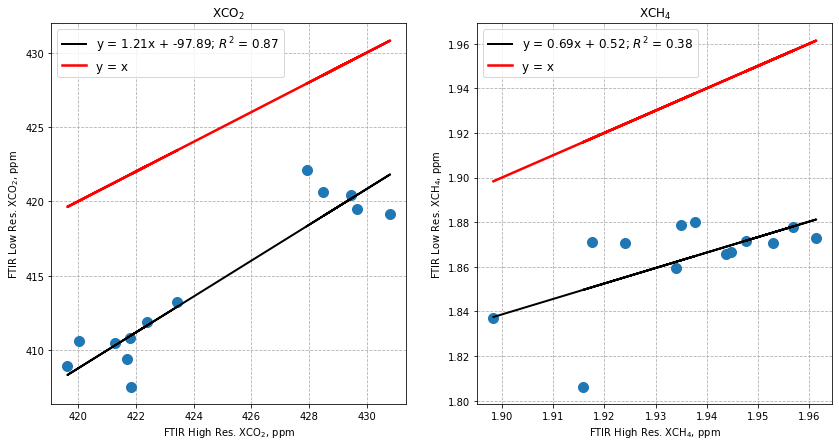

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(tmp['xco2_high'], tmp['xco2_low'], 'o', ms=10)
ax[0].plot(X_1, Y_1_mod, color='black', lw=2, label=f'y = {coef_p:.2f}x + {intercept_p:.2f}; $R^2$ = 0.87')
ax[0].plot(X_1, X_1, color='red', lw=2.5, label='y = x')
ax[0].grid(linestyle='--')
ax[0].legend(fontsize=12)
ax[0].set_title('XCO$_2$')
ax[0].set_xlabel('FTIR High Res. XCO$_2$, ppm')
ax[0].set_ylabel('FTIR Low Res. XCO$_2$, ppm')

ax[1].plot(tmp['xch4_high'], tmp['xch4_low'], 'o', ms=10)
ax[1].plot(X_2, Y_2_mod, color='black', lw=2, label=f'y = {coef_t:.2f}x + {intercept_t:.2f}; $R^2$ = 0.38')
ax[1].plot(X_2, X_2, color='red', lw=2.5, label='y = x')
ax[1].grid(linestyle='--')
ax[1].legend(fontsize=12)
ax[1].set_title('XCH$_4$')
ax[1].set_xlabel('FTIR High Res. XCH$_4$, ppm')
ax[1].set_ylabel('FTIR Low Res. XCH$_4$, ppm')

Correction.

In [22]:
ftir_high_d_avg['xco2_cor'] = ftir_high_d_avg['xco2'] + ((tmp['xco2_low'] - tmp['xco2_high']).mean())
ftir_high_d_avg['xch4_cor'] = ftir_high_d_avg['xch4'] + ((tmp['xch4_low'] - tmp['xch4_high']).mean())

# Averaging:
ftir_high_m_avg = ftir_high_d_avg.resample("m").mean().dropna()
ftir_high_m_avg.index = pd.to_datetime(ftir_high_m_avg.index.strftime('%Y-%m'))

# Mean deviaion:
print('Mean diff. xco2:', (abs(tmp['xco2_low'] - tmp['xco2_high'])).mean())
print('Mean diff. xch4:', (abs(tmp['xch4_low'] - tmp['xch4_high'])).mean())

Mean diff. xco2: 10.301430861613749
Mean diff. xch4: 0.07242808270328635


Plotting by days.

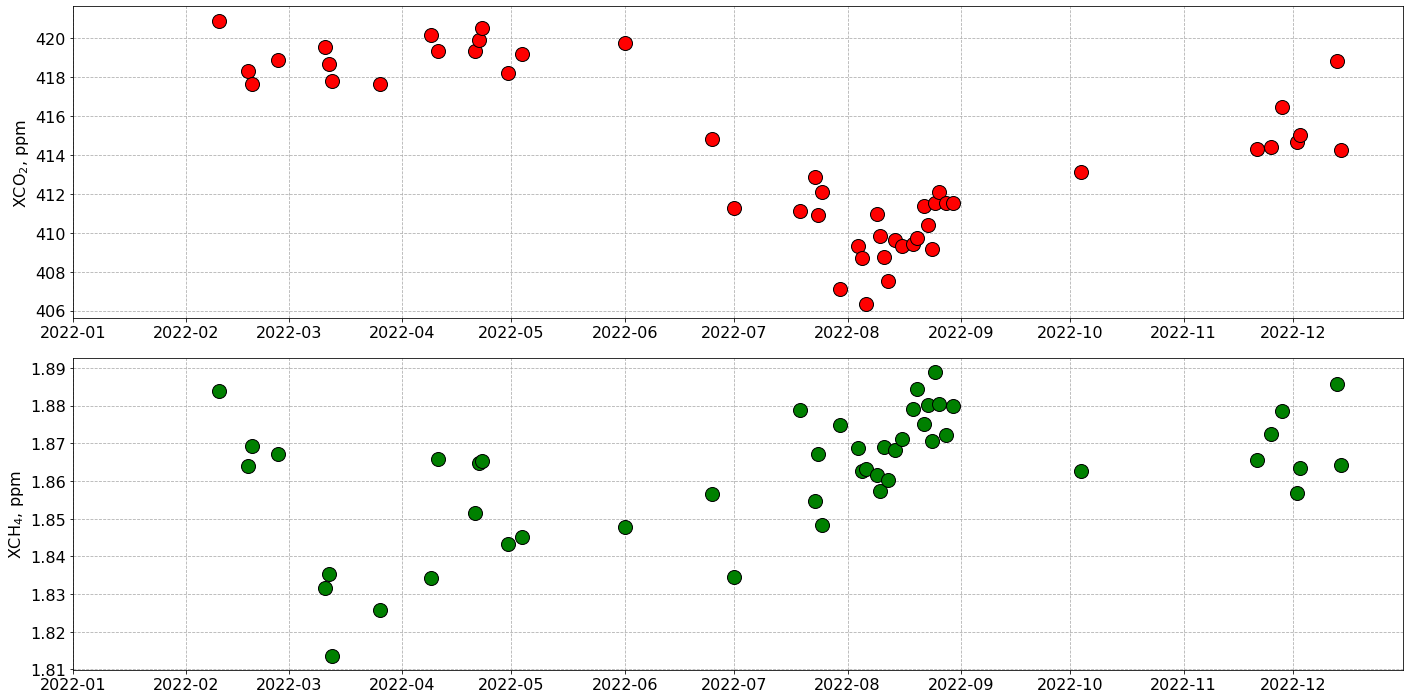

In [23]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(ftir_high_d_avg['xco2_cor'], "o", ms=14, mec="black", color='red')
ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_d_avg['xch4_cor'], "o", ms=14, mec="black", color='green')
ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

fig.tight_layout()

Plotting by months.

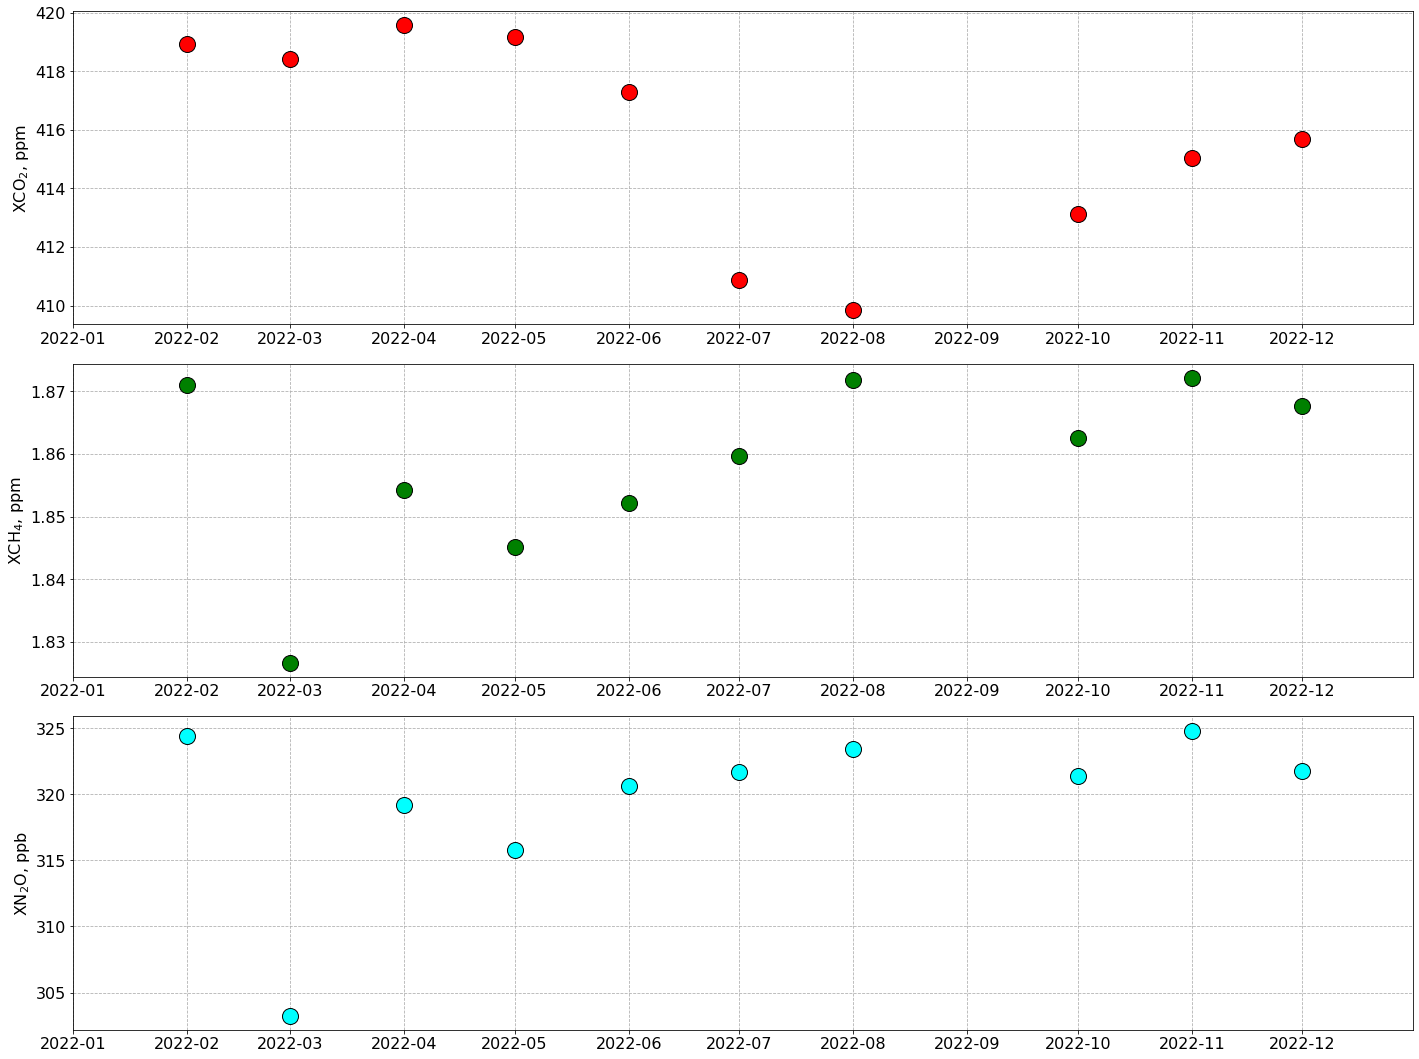

In [24]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(3, 1, figsize = (20,15))
ax[0].plot(ftir_high_m_avg['xco2_cor'], "o", ms=16, mec="black", color='red')
ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_m_avg['xch4_cor'], "o", ms=16, mec="black", color='green')
ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

ax[2].plot(ftir_high_m_avg['xn2o'], "o", ms=16, mec="black", color='cyan')
ax[2].set_ylabel('XN$_2$O, ppb')
ax[2].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[2].grid(linestyle='--')

fig.tight_layout()

FTIR vs. SATELLITES (OCO-2 and GOSAT-2).

In [25]:
# Load and average satellite data:
gosat_d = pd.read_csv('/atm/Kao_carbon/data/gosat-2_d_avg.csv', delimiter=',')
gosat_m = pd.read_csv('/atm/Kao_carbon/data/gosat-2_m_avg.csv', delimiter=',')
oco_d = pd.read_csv('/atm/Kao_carbon/data/oco-2_d_avg.csv', delimiter=',')
oco_m = pd.read_csv('/atm/Kao_carbon/data/oco-2_m_avg.csv', delimiter=',')
gosat_d.index = pd.to_datetime(gosat_d['date'])
gosat_m.index = pd.to_datetime(gosat_m['date'])
oco_d.index = pd.to_datetime(oco_d['date'])
oco_m.index = pd.to_datetime(oco_m['date'])

Plot by days.

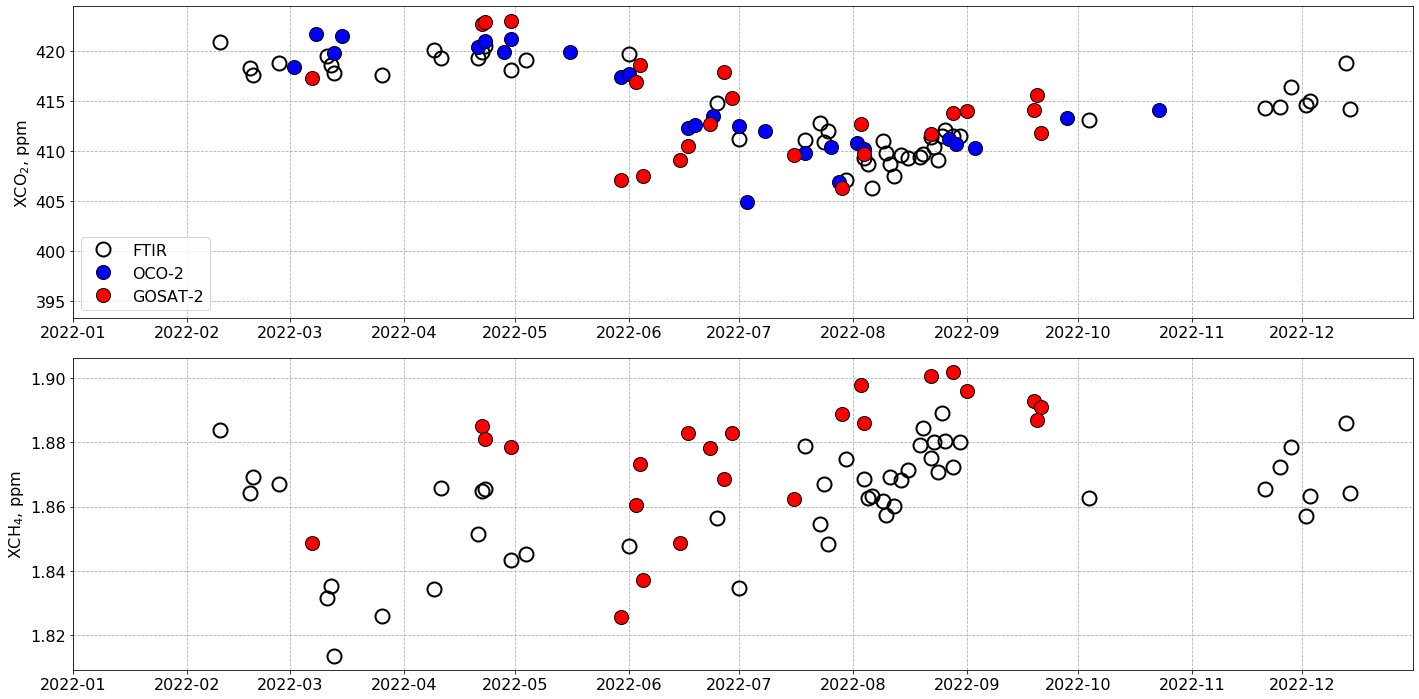

In [26]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(ftir_high_d_avg['xco2_cor'], "o", ms=14, fillstyle='none', mec="black", mew=2, label='FTIR')
ax[0].plot(oco_d['xco2'], "o", ms=14, mec="black", color='blue', label='OCO-2')
ax[0].plot(gosat_d['xco2'], "o", ms=14, mec="black", color='red', label='GOSAT-2')
ax[0].legend(frameon = True)

ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_d_avg['xch4_cor'], "o", ms=14, fillstyle='none', mec="black", mew=2)
ax[1].plot(gosat_d['xch4'], "o", ms=14, mec="black", color='red')

ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

fig.tight_layout()

Plot by months.

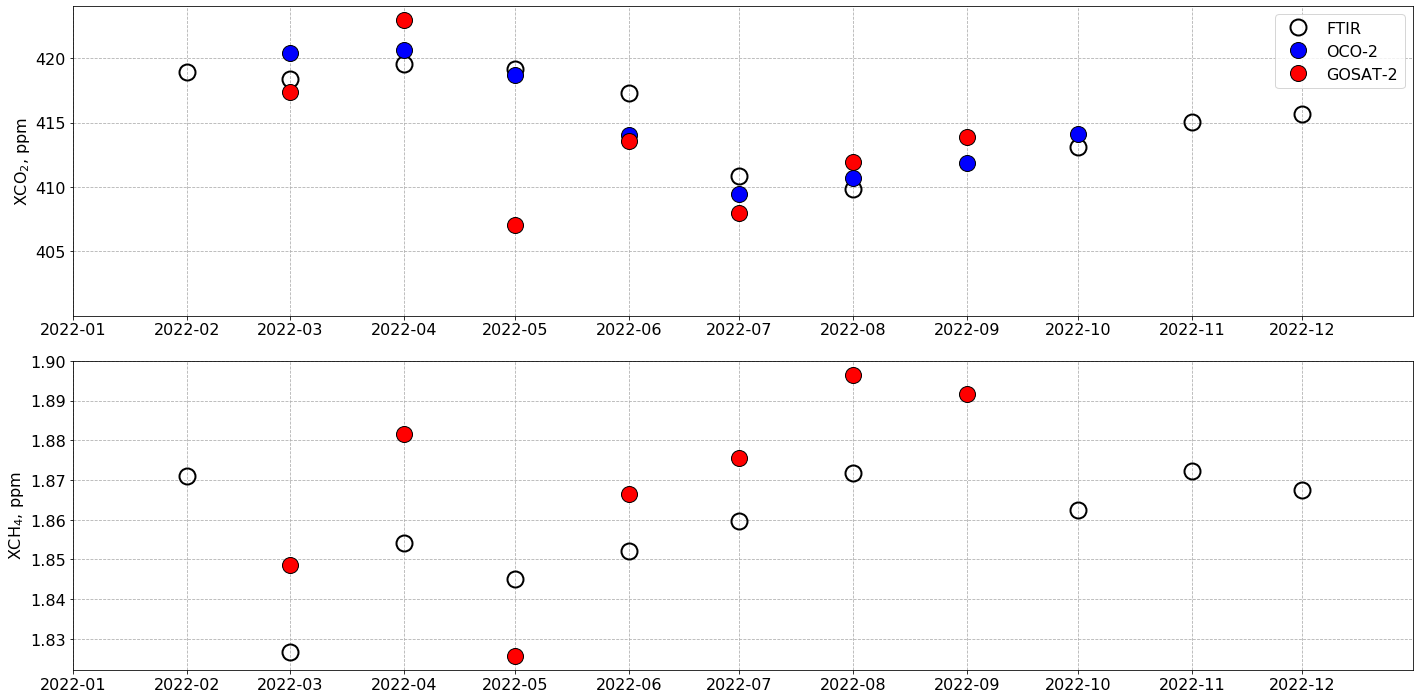

In [27]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(ftir_high_m_avg['xco2_cor'], "o", ms=16, fillstyle='none', mec="black", mew=2, label='FTIR')
ax[0].plot(oco_m['xco2'], "o", ms=16, mec="black", color='blue', label='OCO-2')
ax[0].plot(gosat_m['xco2'], "o", ms=16, mec="black", color='red', label='GOSAT-2')
ax[0].legend(frameon = True)

ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_m_avg['xch4_cor'], "o", ms=16, fillstyle='none', mec="black", mew=2)
ax[1].plot(gosat_m['xch4'], "o", ms=16, mec="black", color='red')

ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

fig.tight_layout()

Correlation.

In [28]:
# Join data by index
tmp1 = ftir_high_d_avg.join(oco_d, how='inner', rsuffix='_oco2')
tmp2 = ftir_high_d_avg.join(gosat_d, how='inner', rsuffix='_gosat2')

In [29]:
display(tmp1)
display(tmp2)

,xn2o,xch4,xco2,xco2_cor,xch4_cor,date,xco2_oco2,err
2022-03-13,298.936786,1.886101,428.099429,417.797998,1.813673,2022-03-13,419.827500,0.785500
2022-04-21,320.005571,1.924059,429.655000,419.353569,1.851630,2022-04-21,420.425578,0.679321
2022-04-23,323.374341,1.937786,430.812253,420.510822,1.865358,2022-04-23,421.025317,0.663470
2022-04-30,316.623397,1.915804,428.488718,418.187287,1.843376,2022-04-30,421.253404,0.642543
2022-06-01,318.749220,1.920228,430.062979,419.761548,1.847800,2022-06-01,417.736893,0.584738
2022-07-01,316.007273,1.907023,421.549720,411.248289,1.834595,2022-07-01,412.521833,0.615417
2022-07-19,324.864167,1.951192,421.424167,411.122736,1.878764,2022-07-19,409.835800,0.649600
2022-08-04,321.839150,1.941104,419.634450,409.333019,1.868676,2022-08-04,410.177329,0.553122


,xn2o,xch4,xco2,xco2_cor,xch4_cor,date,xco2_gosat2,xch4_gosat2
2022-04-22,323.258500,1.937295,430.227500,419.926069,1.864867,2022-04-22,422.753333,1.885067
2022-04-23,323.374341,1.937786,430.812253,420.510822,1.865358,2022-04-23,422.926000,1.881040
2022-04-30,316.623397,1.915804,428.488718,418.187287,1.843376,2022-04-30,423.100000,1.878500
2022-08-04,321.839150,1.941104,419.634450,409.333019,1.868676,2022-08-04,409.680000,1.885850
2022-08-22,324.842432,1.947570,421.679459,411.378029,1.875142,2022-08-22,411.690000,1.900650
2022-08-28,326.044087,1.944725,421.840957,411.539526,1.872297,2022-08-28,413.813333,1.901867


In [30]:
# OCO-2 XCO2:
X_1 = tmp1[['xco2_cor']].values
Y_1 = tmp1['xco2_oco2'].values
model = LinearRegression().fit(X_1, Y_1)
Y_1_mod = model.predict(X_1)
r2 = model.score(X_1, Y_1)
coef_1 = model.coef_[0]
intercept_1 = model.intercept_
print('FTIR vs. OCO-2 XCO2:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

# GOSAT-2 XCO2:
X_2 = tmp2[['xco2_cor']].values
Y_2 = tmp2['xco2_gosat2'].values
model = LinearRegression().fit(X_2, Y_2)
Y_2_mod = model.predict(X_2)
r2 = model.score(X_2, Y_2)
coef_2 = model.coef_[0]
intercept_2 = model.intercept_
print('FTIR vs. GOSAT-2 XCO2:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

# GOSAT-2 XCO2:
X_3 = tmp2[['xch4_cor']].values
Y_3 = tmp2['xch4_gosat2'].values
model = LinearRegression().fit(X_3, Y_3)
Y_3_mod = model.predict(X_3)
r2 = model.score(X_3, Y_3)
coef_3 = model.coef_[0]
intercept_3 = model.intercept_
print('FTIR vs. GOSAT-2 XCH4:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

FTIR vs. OCO-2 XCO2:
Slope: 1.03  Intercept: -10.02  R-squared: 0.89
FTIR vs. GOSAT-2 XCO2:
Slope: 1.25  Intercept: -100.08  R-squared: 0.96
FTIR vs. GOSAT-2 XCH4:
Slope: 0.67  Intercept: 0.64  R-squared: 0.57


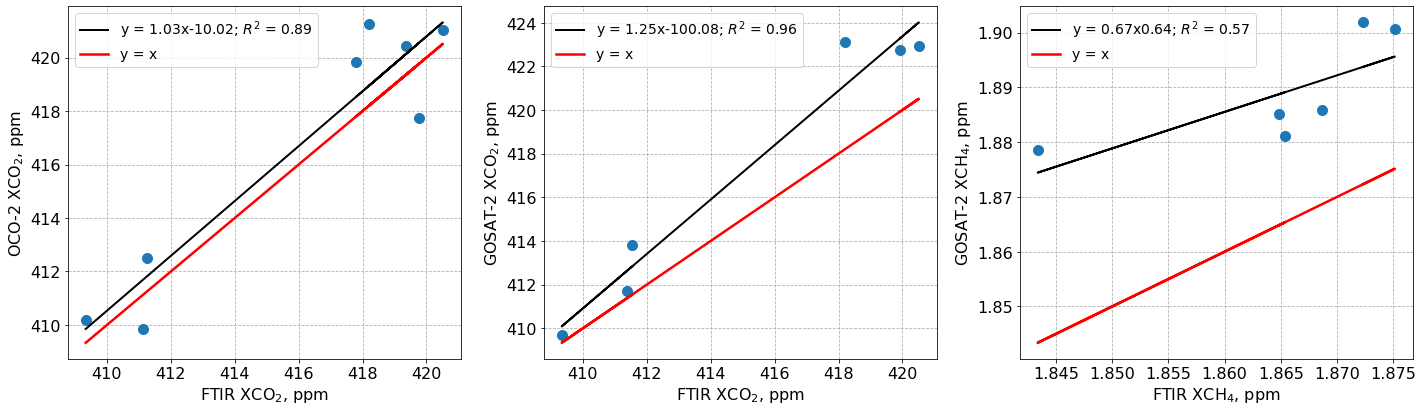

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].plot(tmp1['xco2_cor'], tmp1['xco2_oco2'], 'o', ms=10)
ax[0].plot(X_1, Y_1_mod, color='black', lw=2, label=f'y = {coef_1:.2f}x{intercept_1:.2f}; $R^2$ = 0.89')
ax[0].plot(X_1, X_1, color='red', lw=2.5, label='y = x')
ax[0].grid(linestyle='--')
ax[0].legend(fontsize=14)
ax[0].set_xlabel('FTIR XCO$_2$, ppm')
ax[0].set_ylabel('OCO-2 XCO$_2$, ppm')

ax[1].plot(tmp2['xco2_cor'], tmp2['xco2_gosat2'], 'o', ms=10)
ax[1].plot(X_2, Y_2_mod, color='black', lw=2, label=f'y = {coef_2:.2f}x{intercept_2:.2f}; $R^2$ = 0.96')
ax[1].plot(X_2, X_2, color='red', lw=2.5, label='y = x')
ax[1].grid(linestyle='--')
ax[1].legend(fontsize=14)
ax[1].set_xlabel('FTIR XCO$_2$, ppm')
ax[1].set_ylabel('GOSAT-2 XCO$_2$, ppm')

ax[2].plot(tmp2['xch4_cor'], tmp2['xch4_gosat2'], 'o', ms=10)
ax[2].plot(X_3, Y_3_mod, color='black', lw=2, label=f'y = {coef_3:.2f}x{intercept_3:.2f}; $R^2$ = 0.57')
ax[2].plot(X_3, X_3, color='red', lw=2.5, label='y = x')
ax[2].grid(linestyle='--')
ax[2].legend(fontsize=14)
ax[2].set_xlabel('FTIR XCH$_4$, ppm')
ax[2].set_ylabel('GOSAT-2 XCH$_4$, ppm')

fig.tight_layout()
